In [11]:
# --- 1. Import libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
import joblib

# 2. Simulate the dataset

In [ ]:
np.random.seed(42)
n = 500  # number of students

data = pd.DataFrame({
    'student_id': range(1, n+1),
    'attendance_pct': np.clip(np.random.normal(85, 10, n), 40, 100).astype(int),
    'grades_avg': np.clip(np.random.normal(70, 15, n), 30, 100).astype(int),
    'discipline_count': np.random.poisson(0.7, n),
    'clubs_participation': np.random.choice([0,1], n, p=[0.6,0.4]),
    'family_support': np.random.randint(1,6, n)
})

In [3]:
# Target variable: dropout (1 = dropout, 0 = retained)
data['dropout'] = ((data['attendance_pct'] < 70) & (data['grades_avg'] < 60)).astype(int)

print("✅ Student Data Sample:")
display(data.head())

✅ Student Data Sample:


,student_id,attendance_pct,grades_avg,discipline_count,clubs_participation,family_support,dropout
0,1,89,83,0,1,1,0
1,2,83,98,0,0,4,0
2,3,91,49,1,1,5,0
3,4,100,78,0,0,5,0
4,5,82,60,1,1,5,0


### 3. EDA (Exploratory Data Analysis)

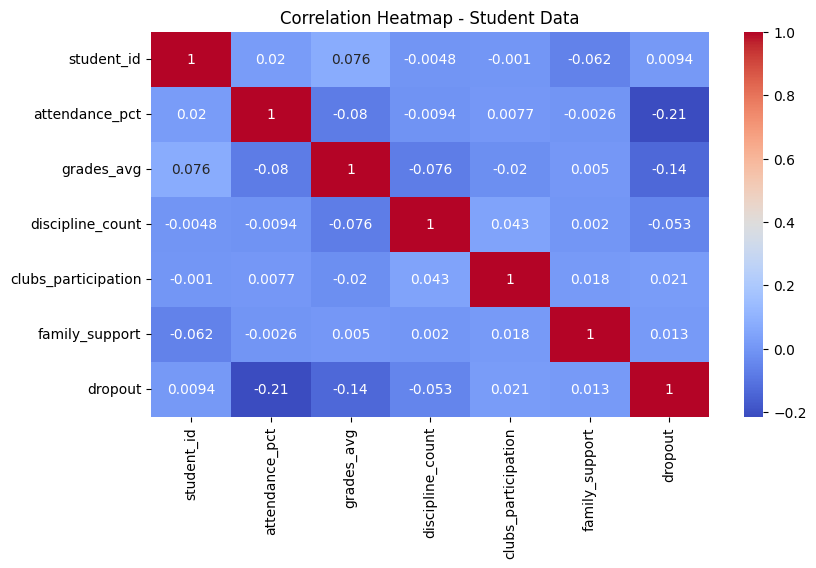

In [6]:
plt.figure(figsize=(9,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Student Data")
plt.show()

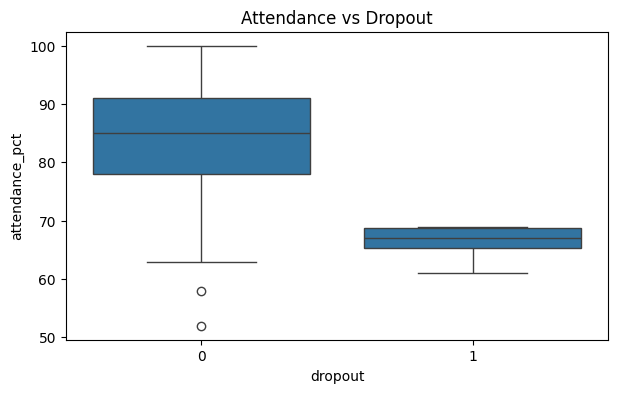

In [5]:
plt.figure(figsize=(7,4))
sns.boxplot(x='dropout', y='attendance_pct', data=data)
plt.title("Attendance vs Dropout")
plt.show()

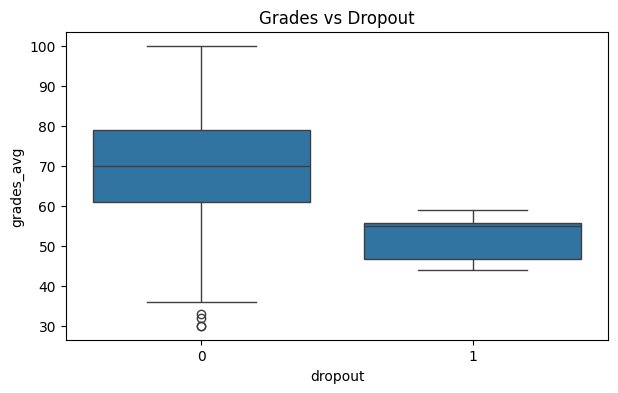

In [7]:
plt.figure(figsize=(7,4))
sns.boxplot(x='dropout', y='grades_avg', data=data)
plt.title("Grades vs Dropout")
plt.show()

### 4. Building a Model

In [8]:
features = ['attendance_pct', 'grades_avg', 'discipline_count', 'clubs_participation', 'family_support']
X = data[features]
y = data['dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

### 5. Model Evaluation

In [9]:
preds = model.predict(X_test)
probs = model.predict_proba(X_test)[:,1]

print("\n📈 Model Performance:")
print(classification_report(y_test, preds))
print("Accuracy:", round(accuracy_score(y_test, preds),3))
print("ROC-AUC:", round(roc_auc_score(y_test, probs),3))


📈 Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        99
           1       0.50      1.00      0.67         1

    accuracy                           0.99       100
   macro avg       0.75      0.99      0.83       100
weighted avg       0.99      0.99      0.99       100

Accuracy: 0.99
ROC-AUC: 0.995


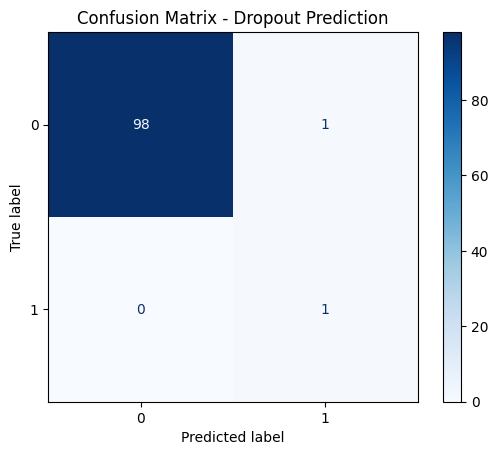

In [12]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Dropout Prediction")
plt.show()

### 6. Feature Importance 

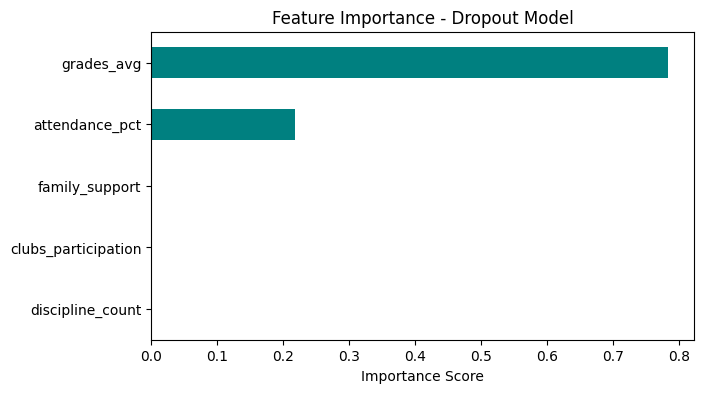

In [13]:
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(7,4))
importances.plot(kind='barh', color='teal')
plt.title("Feature Importance - Dropout Model")
plt.xlabel("Importance Score")
plt.show()

In [ ]:
# Save model and features for backend integration
joblib.dump(model, "dropout_model.pkl")
joblib.dump(features, "model_features.pkl")
print("✅ Dropout Model Saved for Backend Integration")

✅ Dropout Model Saved for Backend Integration


In [15]:
# --- 8. Explainable Prediction Function ---
def explain_risk(row):
    reasons = []
    if row['attendance_pct'] < 70: reasons.append("Low attendance")
    if row['grades_avg'] < 60: reasons.append("Low grades")
    if row['discipline_count'] > 2: reasons.append("Disciplinary issues")
    if row['family_support'] < 3: reasons.append("Low family support")
    if row['clubs_participation'] == 0: reasons.append("No club participation")
    return reasons if reasons else ["No major risk factors"]

sample = X_test.iloc[3]
reasons = explain_risk(sample)
print("\n🔍 Sample Prediction Explanation:")
print(sample)
print("Predicted Dropout Probability:", round(model.predict_proba([sample])[0][1], 2))
print("Reasons:", reasons)


🔍 Sample Prediction Explanation:
attendance_pct         77
grades_avg             60
discipline_count        1
clubs_participation     1
family_support          1
Name: 348, dtype: int32
Predicted Dropout Probability: 0.0
Reasons: ['Low family support']


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
